In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import powerlaw

%run backwards_time_voter_model.ipynb

In [7]:
# Define parameters as in paper
alpha = 3e-3
L = 300
eta = -10.8

In [8]:
species_load_eta = voter_model_fast(L, alpha, kernel='fat tail', W=16, eta=eta)

  1%|▎                                     | 799/90000 [00:03<05:38, 263.64it/s]


KeyboardInterrupt: 

In [12]:
species_load_eta = pickle.load(open(f"Varying eta runs/300x300,alpha=0.003,kernel=fat_tail,eta=-3.6,W=16.p_1", "rb"))
species_ids = np.random.uniform(size=len(species_load_eta))
print(len(species_load_eta))

grid = np.zeros((300, 300))
for i, specie in enumerate(species_load_eta):
    for coord in specie:
        grid[coord] = species_ids[i]

277


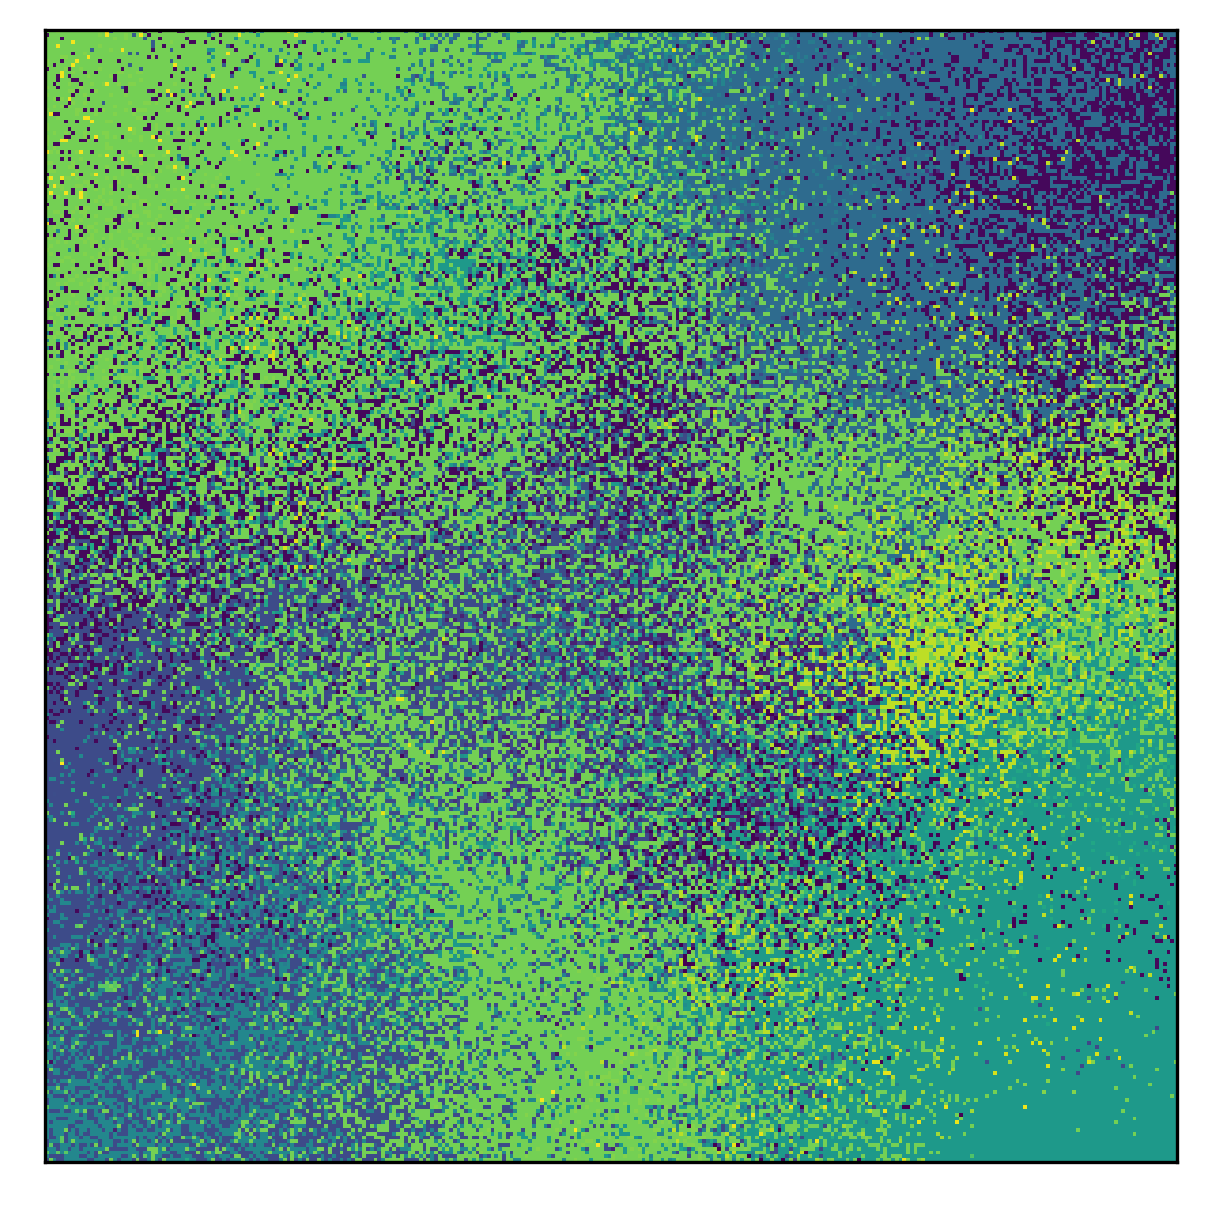

In [13]:
plt.figure(figsize=(5, 5))
plt.imshow(grid)
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
n_centers = 10

areas = []
num_species = []

grids = [grid]

for grid in grids:
    areas, cur_num_species = sa_curve(grid, n_centers)
    num_species = num_species + cur_num_species
    
spec_std_dev = np.std(num_species, axis=0)
spec_mean = np.mean(num_species, axis=0)

In [15]:
def power_law(A, c, z):
    return c*A**z

In [16]:
from scipy.stats import kstest
from scipy.optimize import curve_fit

x_min = 35

(fit_c, fit_z), pcov = curve_fit(power_law, areas[x_min:], spec_mean[x_min:], p0=[0.1, 1])
res = kstest(spec_mean[x_min:], fit_c*np.array(areas[x_min:])**fit_z)
print(res)

KstestResult(statistic=0.043478260869565216, pvalue=0.9999260546649764)


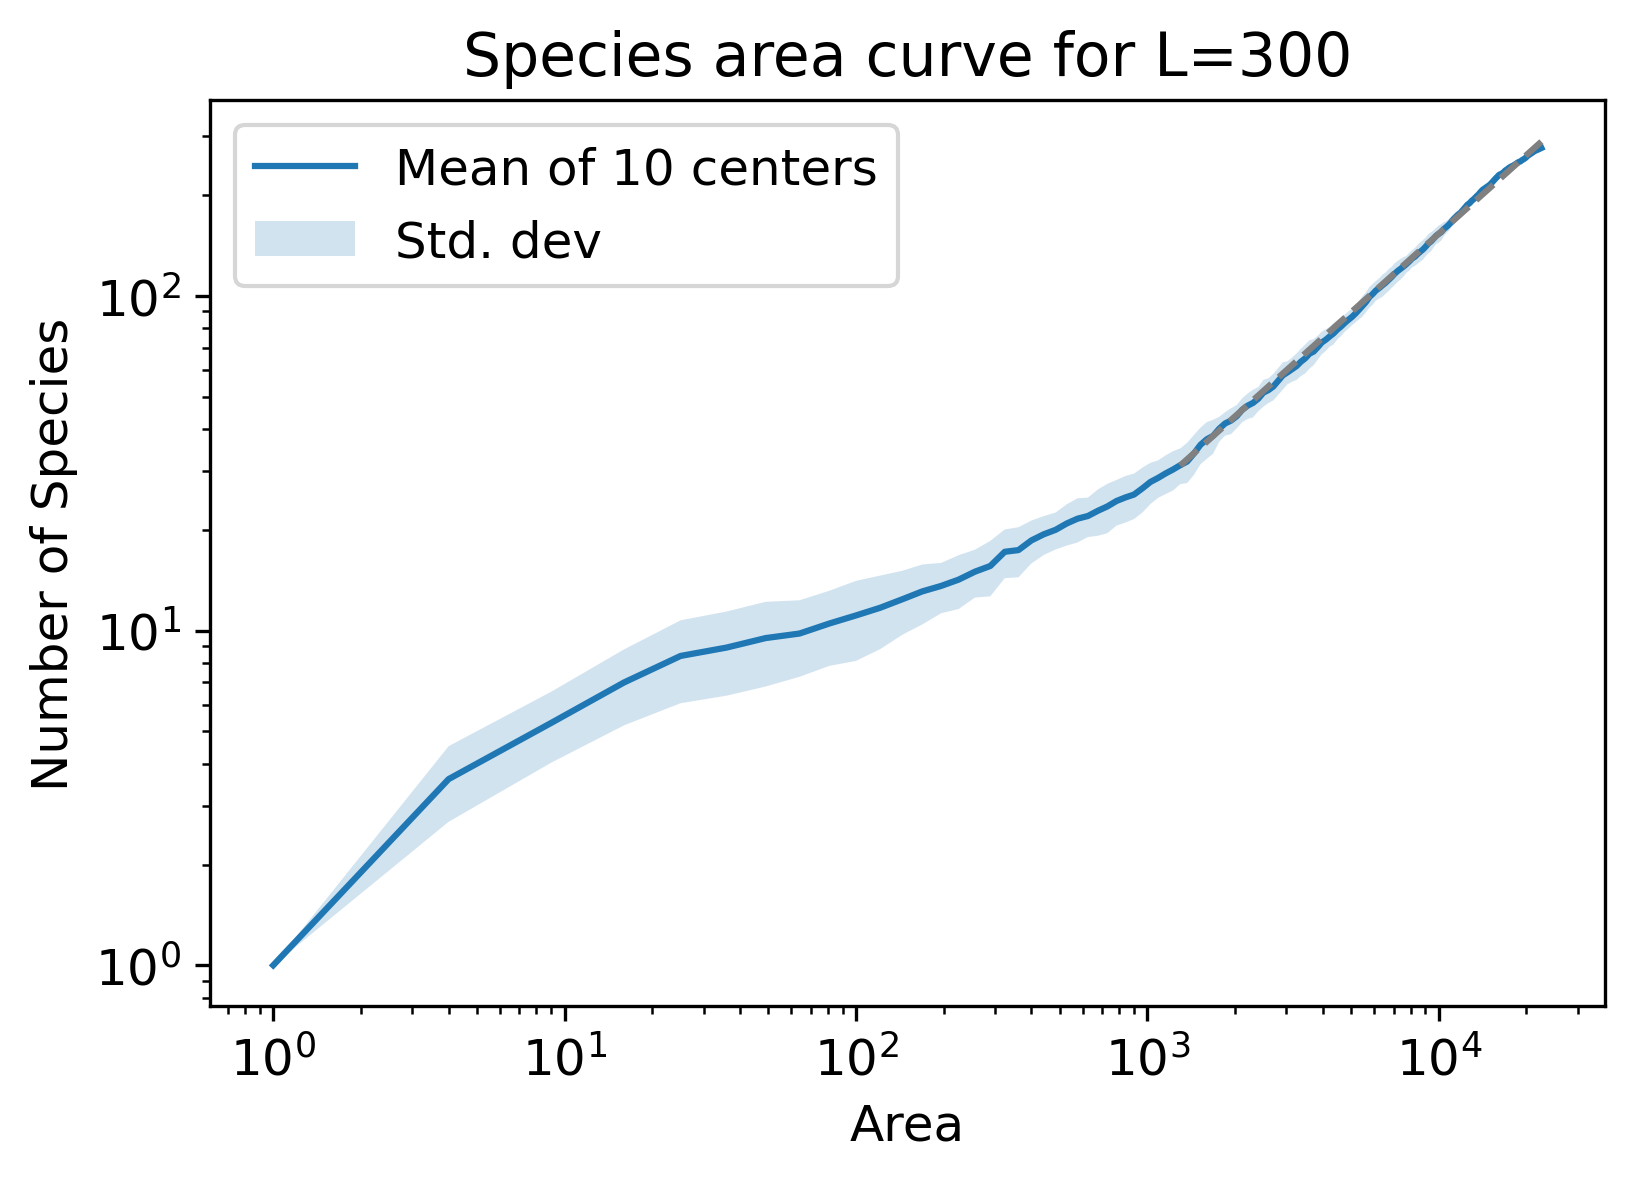

In [19]:
plt.loglog(areas, spec_mean, label='Mean of 10 centers')
plt.loglog(areas[x_min:],
           fit_c*np.array(areas[x_min:])**fit_z,
           linestyle='dashed',
           color='grey')
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')
plt.ylabel('Number of Species')
plt.xlabel('Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()

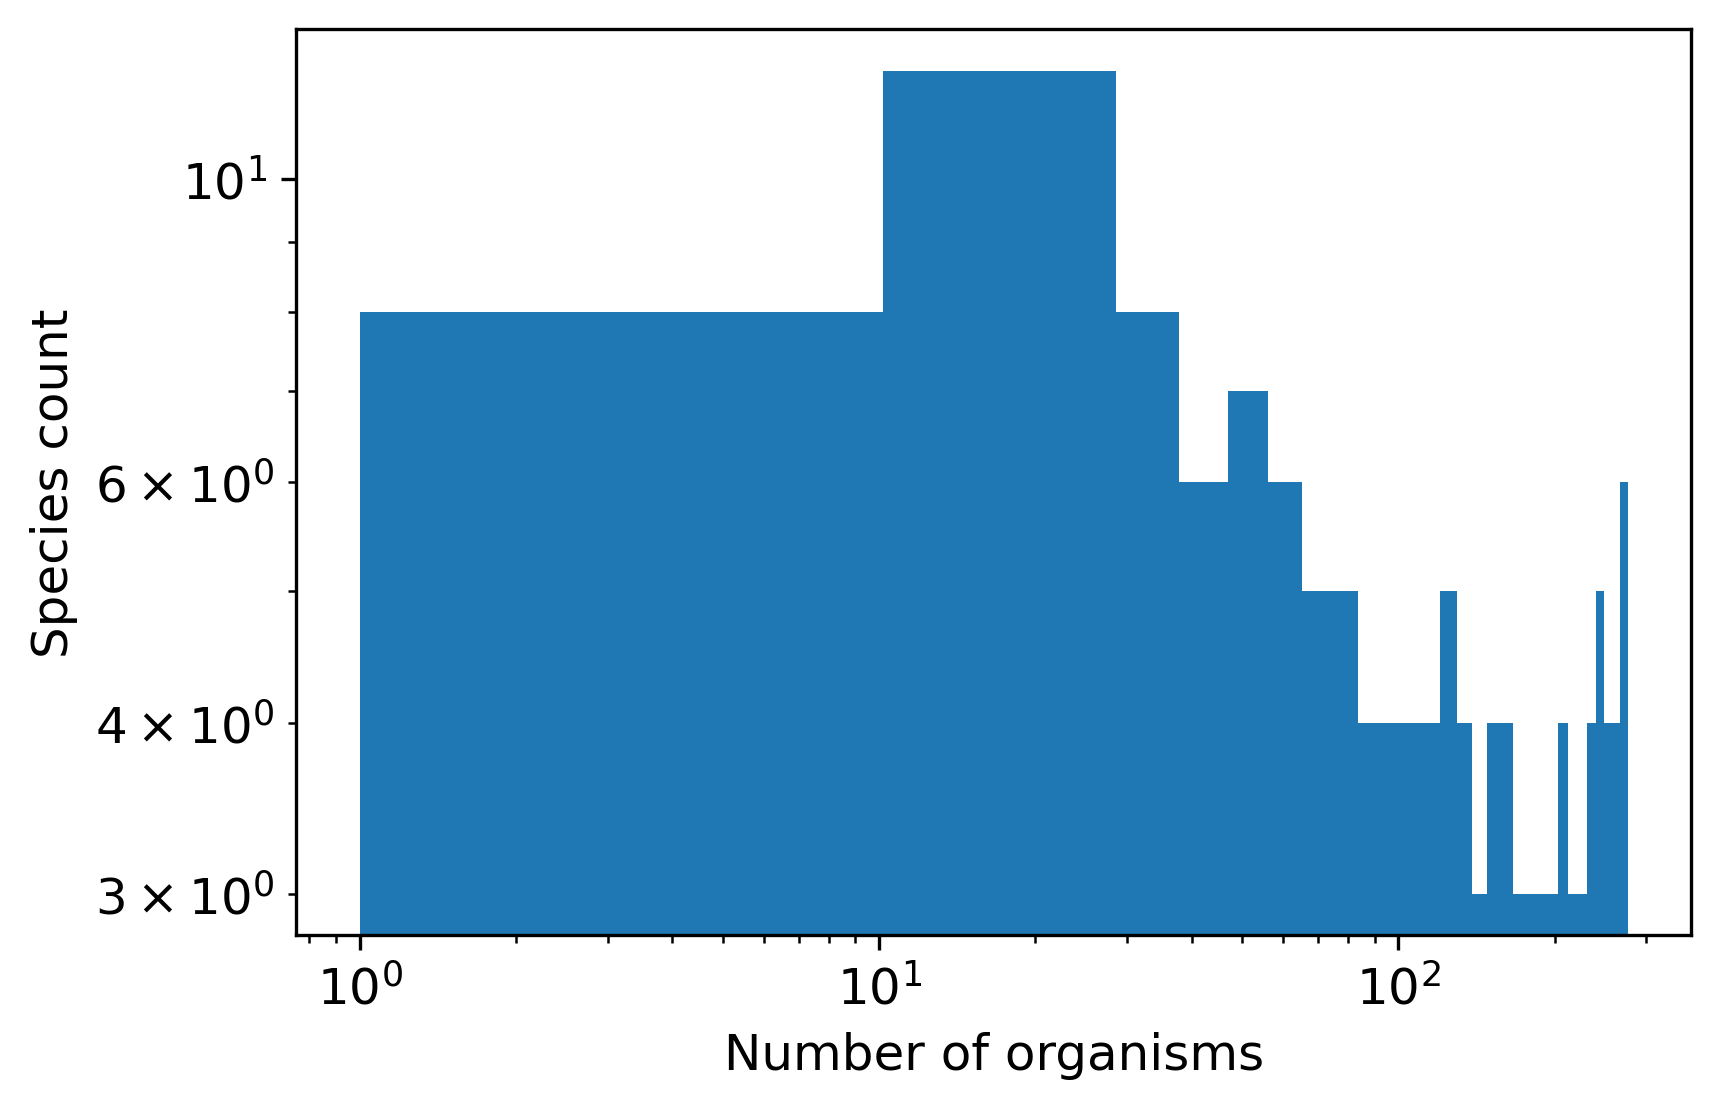

In [20]:
plt.hist(spec_mean, bins=30, log=True)
plt.xlabel('Number of organisms')
plt.ylabel('Species count')
plt.xscale('log')
plt.show()

In [ ]:
species_load_eta = pickle.load(open(f"500x500,alpha=0.0003,kernel=fat_tail,eta=-10.8.p_1", "rb"))
for specie in species_load_eta:
    species_sizes.append(len(specie))
species_ids = np.random.uniform(size=len(species_load))
print(len(species_load))